In [2]:
from datasets import load_dataset

ds = load_dataset("antoniomenezes/go_emotions_ptbr")

ds

Found cached dataset csv (/users/jmperez/.cache/huggingface/datasets/antoniomenezes___csv/raw-30cf391cb2a99fe8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'texto'],
        num_rows: 211225
    })
})

Let's check that this is the same as the emotion dataset in English


In [3]:
ds_en = load_dataset("go_emotions", "raw")

ds_en_simplified = load_dataset("go_emotions", "simplified")
ds_en, ds_en_simplified

Found cached dataset go_emotions (/users/jmperez/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset go_emotions (/users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/3 [00:00<?, ?it/s]

(DatasetDict({
     train: Dataset({
         features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
         num_rows: 211225
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 43410
     })
     validation: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 5426
     })
     test: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 5427
     })
 }))

In [4]:
df = ds["train"].to_pandas()
df_en = ds_en["train"].to_pandas()

## Sanity check

In [6]:
check_columns = [
    'author', 'subreddit', 'link_id', 'parent_id',
    'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
    'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
    'remorse', 'sadness', 'surprise', 'neutral'
]

# Check df and df_en match for the same id 

(df[check_columns] == df_en[check_columns]).all()

author                   True
subreddit                True
link_id                  True
parent_id                True
created_utc              True
rater_id                 True
example_very_unclear    False
admiration               True
amusement                True
anger                    True
annoyance                True
approval                 True
caring                   True
confusion                True
curiosity                True
desire                   True
disappointment           True
disapproval              True
disgust                  True
embarrassment            True
excitement               True
fear                     True
gratitude                True
grief                    True
joy                      True
love                     True
nervousness              True
optimism                 True
pride                    True
realization              True
relief                   True
remorse                  True
sadness                  True
surprise  

In [7]:
(df["example_very_unclear"] != df_en["example_very_unclear"]).sum()

3411

(array([   70.,   592., 37335.,  2104., 17910.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

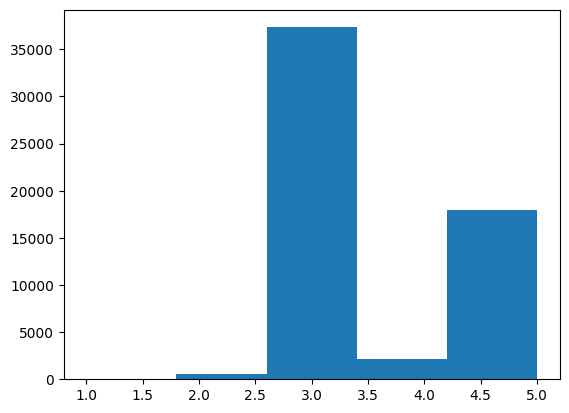

In [19]:
import matplotlib.pyplot as plt

ids = df["id"].value_counts()


plt.hist(ids, bins=5)

In [20]:
# Get ids with more than 3 ratings
ids = set(ids[ids >= 3].index)
ds = ds.filter(lambda x: x["id"] in ids)

ds

Filter:   0%|          | 0/209971 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'texto'],
        num_rows: 209971
    })
})

In [21]:
df = ds["train"].to_pandas()

In [22]:
df.shape

(209971, 38)

In [53]:
columns = [ 
    'id',
    'example_very_unclear',
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]



df_agg = df[columns].groupby("id")

# Add the number of ratings per id as a column

In [54]:
df_agg["example_very_unclear"]

In [55]:
df_agg = df_agg.sum()
df_agg = df_agg[df_agg["example_very_unclear"] == 0]
df_agg["count"] = df["id"].value_counts()

df_agg

,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,count
id,,,,,,,,,,,,,,,,,,,,,
eczb4bm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
eczb527,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,3
eczb6r7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,2,5
eczb770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,4
eczbbmd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efhclgb,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,3
efhcm78,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,5
efhcnhz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [57]:
emotions = [
    'admiration', 'amusement', 'anger', 'annoyance',
    'approval', 'caring', 'confusion', 'curiosity', 'desire',
    'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
    'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]

id
eczb4bm    1.5
eczb527    1.5
eczb6r7    2.5
eczb770    2.0
eczbbmd    1.5
          ... 
efhclgb    1.5
efhcm78    2.5
efhcnhz    1.5
efhcreo    1.5
efhcuxi    1.5
Name: count, Length: 54619, dtype: float64

In [ ]:


# Check if the emotion is present in more than half of the ratings
df_final = df_agg[emotions].gt(df_agg["count"] / 2, axis=0)

df_final = df_final.join(df[["id", "text", "texto"]].set_index("id")).reset_index()

# Reorder columns
df_final = df_final[["id", "text", "texto"] + emotions].copy()


df_final

In [17]:
df_final.sample(10)

,id,text,texto,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
132693,eeniywp,Cute pupper 😍😍😍,Peitos lindos 😍😍😍,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98987,ee7iifb,"Not practicing with the team, seems like a bad...","Não treinar com a equipe, parece um mau sinal ...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144405,ees834v,just read it... how do these people get away w...,apenas leia... como essas pessoas se safam com...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110494,eec8o7h,It took me 14 years to secure my AA 🐢,Levei 14 anos para garantir meu AA 🐢,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
176881,ef7j6vd,RemindMe! 1 day,Lembre-me! 1 dia,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
20268,ed7vvvh,"That's what I can't understand either, what we...","É isso que eu também não consigo entender, o q...",False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
148207,eetpe9w,I trust [NAME] in getting us the people we nee...,Confio em [NOME] para conseguir as pessoas de ...,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
196672,efgtqxs,"The opposite of depression isnt happiness, its...","O oposto da depressão não é a felicidade, sua ...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9348,ed3am37,> I hate how much I care. My feelings exactly.,> Eu odeio o quanto eu me importo. Exatamente ...,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35342,edf23dn,It most definitely is! You’ve gotta pick some ...,Com certeza é! Você tem que pegar alguns!!,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Better option:

- Let's take the ds_en_simplified and use the translation to pt



In [75]:
id_to_pt = {row["id"]: row["texto"] for _, row in df.iterrows()}

ds_en_simplified


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [76]:
new_ds = ds_en_simplified.filter(lambda x: x["id"] in id_to_pt)

Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-cc9dd3a66cf6bb04.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-c89027ba8ef947a7.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-75d79a3b424dd37b.arrow


In [77]:
new_ds = new_ds.map(lambda ex: {"text": id_to_pt[ex["id"]], "text_original": ex["text"]})

Map:   0%|          | 0/42958 [00:00<?, ? examples/s]

Map:   0%|          | 0/5372 [00:00<?, ? examples/s]

Map:   0%|          | 0/5375 [00:00<?, ? examples/s]

In [80]:
new_ds["train"][127]

{'text': 'Sim eu sou! Vou enviar-te uma mensagem privada com um link para o meu perfil. Obrigada.',
 'labels': [15],
 'id': 'edijgo3',
 'text_original': "Yeah, I am! I'll private message you a link to my profile. Thank you."}

In [83]:
new_ds.push_to_hub("pysentimiento/pt_emotion", private=True)

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/43 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]